In [3]:
import numpy as np
import scipy.fftpack as fft
import numpy.random as rnd
import matplotlib.pyplot as plt

In [37]:
PIT = 1  # Process Time
Fs = 10e3  # Sampling Freq
Freq = 100  # Jammer Freq
NumSamples = PIT * Fs  # Number of samples to process
t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
f = np.arange(0, NumSamples - 1, 1) / PIT  # Frequency Samples
CWa = 1 * np.exp(2j * np.pi * Freq * t)  # Simulate a complex sin signal with frequency of 500
CWb = 1 * np.exp(2j * (np.pi * Freq * t+0.9*np.pi)) # Simulate a complex sin signal with frequency of 500

In [38]:
var = 1
sig_a = CWa# + np.sqrt(var) * rnd.randn(len(CW)) + np.sqrt(var) * 1j * rnd.randn(len(CW)) 
sig_b = CWb# + np.sqrt(var) * rnd.randn(len(CW)) + np.sqrt(var) * 1j * rnd.randn(len(CW)) ## Adding noise to the CW signal with Variance of var

(0.0, 200.0)

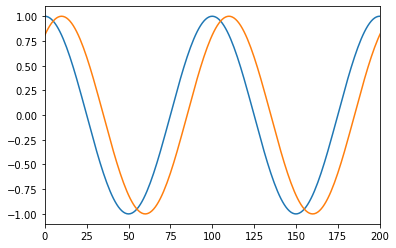

In [39]:

plt.plot(sig_a.real)
plt.plot(sig_b.real)

plt.xlim([0,200])

In [40]:
# zero pad
zeros = [0 for i in range(len(CWa)+1)]
sig_a = np.append(sig_a, zeros)
sig_b = np.append(sig_b, zeros)

(150.0, 250.0)

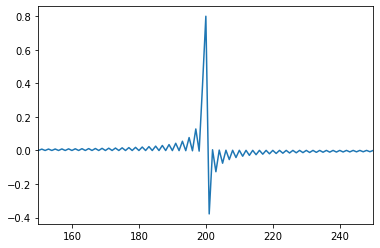

In [41]:
fft_a = fft.fft(sig_a)
fft_b = np.conj(fft.fft(sig_b))
norm_fft_a = 2/len(fft_a)*fft_a[:len(fft_a)//2]
norm_fft_b = 2/len(fft_b)*fft_b[:len(fft_b)//2]
plt.plot(norm_fft_b.real)
plt.xlim([150,250])

(0.0, 200.0)

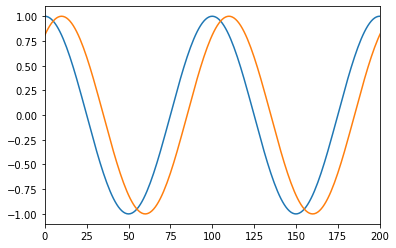

In [89]:
inv_fft_a = fft.ifft(fft_a)
inv_fft_b = fft.ifft(fft.fft(sig_b))
plt.plot(inv_fft_a.real)
plt.plot(inv_fft_b.real)

plt.xlim([0,200])

In [83]:
norm_fft_a[200]

(0.9997855615523317-0.01570353026703496j)

In [84]:
np.dot(norm_fft_b[200], norm_fft_a[200])

(0.8088695671687125+0.5876781401573551j)

(150.0, 250.0)

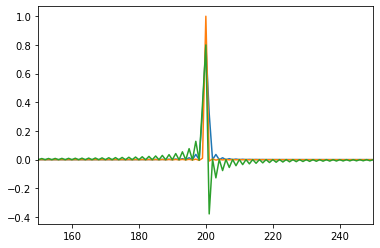

In [96]:
plt.plot((norm_fft_b * norm_fft_a).real)
plt.plot(norm_fft_a.real)
plt.plot(norm_fft_b.real)
plt.xlim([150,250])

/mnt/BigSlowBoi/DOCUMENTS/Python/venv/development/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(150.0, 250.0)

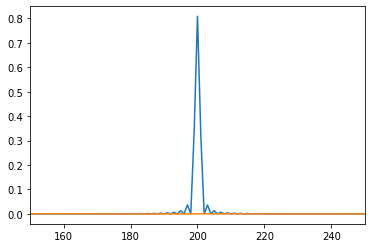

In [98]:
plt.plot(norm_fft_b * norm_fft_a)
plt.plot(fft.ifft(norm_fft_b * norm_fft_a).imag)
plt.xlim([150,250])

In [91]:
double_fft = norm_fft_b * norm_fft_a
inv_fft = abs(np.fft.ifft(double_fft))
shifted_res = np.fft.fftshift(inv_fft)

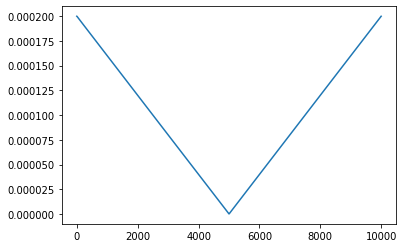

In [93]:
plt.figure()
plt.plot(inv_fft)
# plt.xticks(np.arange(-int(len(inv_fft)/2), int(len(inv_fft)/2+1)))
plt.show()

In [45]:
x_axis = np.arange(-int(len(shifted_res)/2), int(len(shifted_res)/2+1))
x_axis[np.argmax(shifted_res)]

0

In [587]:
int(len(inv_fft)/2)

4999